#   **PREDICTING THE STRESS LEVELS OF SOCIAL MEDIA USERS**


---


## **Introduction**
Stress is a largely common occurrence, with evidence of its universality and recent rise. People's primary source of information and communication nowadays is social media. People's lives, as well as healthcare and wellness studies, are altering as a result of the advent of social media. Many of them spend hours each day on major social media platforms like Messenger, Instagram, and Facebook. As a result, numerous academics and researchers are studying the influence of social media and apps on many parts of people's life.

## **About the Dataset**
There are multiple datasets consisting of social media details . The dataset provides a great opportunity to let us explore in different angles. Dreaddit, a dataset of lengthy social media posts in five categories, each including stressful and non-stressful text and different ways of expressing stress, with a subset of the data annotated by human annotators

## ***Table of Contents***
•	Introduction

•	Data collection

•	Data Hosting

•	Data Cleaning

•	Data Visualization

•	Cleaning and Vectorization

•	Word-cloud based on Label

•	Word-cloud Based on Sentiment

•	Tokenization

•	Lemmatize & Stem Tokens

•	Vectorization

•	Correlation Method

•	Machine Learning Models

•	Prediction and Evaluation


### **Importing the required Packages**

In [ ]:
!pip install plotly

In [ ]:
!sudo pip install plotly

In [ ]:
!pip install --upgrade plotly

     |████████████████████████████████| 15.2 MB 52 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
## Loading the required libraries:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
import datetime as dt
import calendar
from scipy.stats import skew,kurtosis
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
sns.set(style='white', context='notebook', palette='deep')
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline
import missingno as msno
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
import plotly.graph_objs as go


In [ ]:
pd.set_option('display.max_columns', 500)

### **Importing the Dataset**

In [ ]:
test_df = pd.read_csv("dreaddit-test.csv")
test_df.head(5)

id      subreddit post_id sentence_range  \
0    896  relationships  7nu7as       [50, 55]   
1  19059        anxiety  680i6d        (5, 10)   
2   7977           ptsd  8eeu1t        (5, 10)   
3   1214           ptsd  8d28vu         [2, 7]   
4   1965  relationships  7r1e85       [23, 28]   

                                                text  label  confidence  \
0  Its like that, if you want or not.“ ME: I have...      0         0.8   
1  I man the front desk and my title is HR Custom...      0         1.0   
2  We'd be saving so much money with this new hou...      1         1.0   
3  My ex used to shoot back with "Do you want me ...      1         0.5   
4  I haven’t said anything to him yet because I’m...      0         0.8   

   social_timestamp  social_karma  syntax_ari  lex_liwc_WC  lex_liwc_Analytic  \
0        1514980773            22   -1.238793           55               2.82   
1        1493348050             5    7.684583           72              64.56   
2        1524516630            10    2.360408          148              14.79   
3        1524018289             5    5.997000          100              32.13   
4        1516200171           138    4.649418           78               4.96   

   lex_liwc_Clout  lex_liwc_Authentic  lex_liwc_Tone  lex_liwc_WPS  \
0           57.22               55.41           5.95         11.00   
1           50.00               31.19          92.40         14.40   
2           75.05               62.88          16.15         21.14   
3           38.19               79.76          12.51         20.00   
4           50.00               71.23          89.84         15.60   

   lex_liwc_Sixltr  lex_liwc_Dic  lex_liwc_function  lex_liwc_pronoun  \
0             7.27         94.55              67.27             29.09   
1            25.00         84.72              44.44              9.72   
2            10.81         94.59              59.46             23.65   
3             9.00         92.00              64.00             28.00   
4            21.79         96.15              65.38             24.36   

   lex_liwc_ppron  lex_liwc_i  lex_liwc_we  lex_liwc_you  lex_liwc_shehe  \
0           18.18        5.45         0.00          9.09            3.64   
1            8.33        6.94         1.39          0.00            0.00   
2           14.19        6.08         2.03          0.68            2.70   
3           17.00       12.00         1.00          2.00            2.00   
4           19.23       11.54         0.00          1.28            3.85   

   lex_liwc_they  lex_liwc_ipron  lex_liwc_article  lex_liwc_prep  \
0           0.00           10.91              0.00          12.73   
1           0.00            1.39              5.56          11.11   
2           2.70            9.46              2.70          12.16   
3           0.00           11.00              4.00          15.00   
4           2.56            5.13              1.28          11.54   

   lex_liwc_auxverb  lex_liwc_adverb  lex_liwc_conj  lex_liwc_negate  \
0              7.27             1.82          14.55             7.27   
1              8.33             5.56           8.33             0.00   
2             10.14             6.08           9.46             0.68   
3              6.00             6.00           4.00             2.00   
4             12.82             8.97           6.41             3.85   

   lex_liwc_verb  lex_liwc_adj  lex_liwc_compare  lex_liwc_interrog  \
0          18.18          1.82              3.64               1.82   
1          13.89          1.39              0.00               2.78   
2          20.27          4.73              2.70               0.68   
3          20.00          2.00              2.00               3.00   
4          21.79          2.56              0.00               3.85   

   lex_liwc_number  lex_liwc_quant  lex_liwc_affect  lex_liwc_posemo  \
0             5.45            0.00             1.82             0.00   
1             2.78            1

In [ ]:
train_df = pd.read_csv("dreaddit-train.csv")
train_df.head(5)

subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  lex_liwc_WC  \
0         0.8        1521614353             5    1.806818          116   
1         1.0        1527009817             4    9.429737          109   
2         0.8        1535935605             2    7.769821          167   
3         0.6        1516429555             0    2.667798          273   
4         0.8        1539809005            24    7.554238           89   

   lex_liwc_Analytic  lex_liwc_Clout  lex_liwc_Authentic  lex_liwc_Tone  \
0              72.64           15.04               89.26           1.00   
1              79.08           76.85               56.75          98.18   
2              33.80           76.38               86.24          25.77   
3               2.98           15.25               95.42          79.26   
4              32.22           28.71               84.01           1.00   

   lex_liwc_WPS  lex_liwc_Sixltr  lex_liwc_Dic  lex_liwc_function  \
0         29.00            12.93         87.07              56.03   
1         27.25            21.10         87.16              48.62   
2         33.40            17.37         91.02              61.68   
3         54.60             8.06         98.90              65.57   
4         17.80            31.46         88.76              52.81   

   lex_liwc_pronoun  lex_liwc_ppron  lex_liwc_i  lex_liwc_we  lex_liwc_you  \
0             16.38           12.07        9.48         0.00          0.86   
1             11.93            7.34        1.83         2.75          2.75   
2             25.15           16.17        8.98         1.80          1.80   
3             30.40           23.44       16.12         0.37          0.37   
4             15.73           11.24        7.87         0.00          0.00   

   lex_liwc_shehe  lex_liwc_they  lex_liwc_ipron  lex_liwc_article  \
0            1.72            0.0            4.31              3.45   
1            0.00            0.0            4.59              8.26   
2            2.99            0.6            8.98              5.39   
3            6.59            0.0            6.96              3.30   
4            3.37            0.0            4.49              4.49   

   lex_liwc_prep  lex_liwc_auxverb  lex_liwc_adverb  lex_liwc_conj  \
0          19.83              7.76             5.17           4.31   
1          13.76              6.42             3.67           8.26   
2          12.57             10.18             1.80           5.99   
3           9.16              8.79             6.59           9.89   
4           8.99             13.48             4.49           4.49   

   lex_liwc_negate  lex_liwc_verb  lex_liwc_adj  lex_liwc_compare  \
0             1.72          16.38          6.03              3.45   
1             0.92          15.60          2.75              0.92   
2             1.20          20.96          1.20              0.60   
3             3.66          20.88          3.66              1.83   
4             2.25          13.48          4.49              2.25   

   lex_liwc_interrog  lex_liwc_number  lex_liwc_quant  lex_liwc_affect  \
0               0.86             1.72            1.72             8.62   
1               0.92             2.75            0.92             5.50   
2               0.60             1.20            1.80

### **Shape of the Dataset**

In [ ]:
print(train_df.columns)
print(train_df.shape)

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)
(2838, 116)


In total, there are 2838 rows and 111 columns present in the train dataset.

In [ ]:
train_df.describe()

id        label   confidence  social_timestamp  social_karma  \
count   2838.000000  2838.000000  2838.000000      2.838000e+03   2838.000000   
mean   13751.999295     0.524313     0.808972      1.518107e+09     18.262156   
std    17340.161897     0.499497     0.177038      1.552209e+07     79.419166   
min        4.000000     0.000000     0.428571      1.483274e+09      0.000000   
25%      926.250000     0.000000     0.600000      1.509698e+09      2.000000   
50%     1891.500000     1.000000     0.800000      1.517066e+09      5.000000   
75%    25473.750000     1.000000     1.000000      1.530898e+09     10.000000   
max    55757.000000     1.000000     1.000000      1.542592e+09   1435.000000   

        syntax_ari  lex_liwc_WC  lex_liwc_Analytic  lex_liwc_Clout  \
count  2838.000000  2838.000000        2838.000000     2838.000000   
mean      4.684272    85.996124          35.240941       40.948231   
std       3.316435    32.334887          26.486189       31.587117   
min      -6.620000     5.000000           1.000000        1.000000   
25%       2.464243    65.000000          12.410000       12.135000   
50%       4.321886    81.000000          29.420000       33.520000   
75%       6.505657   101.000000          55.057500       69.320000   
max      24.074231   310.000000          99.000000       99.000000   

       lex_liwc_Authentic  lex_liwc_Tone  lex_liwc_WPS  lex_liwc_Sixltr  \
count         2838.000000    2838.000000   2838.000000      2838.000000   
mean            67.044249      33.428157     18.189475        14.858157   
std             32.880644      35.334770      9.516060         5.531303   
min              1.000000       1.000000      2.400000         0.000000   
25%             41.070000       1.420000     13.400000        11.110000   
50%             80.710000      25.770000     16.775000        14.290000   
75%             96.180000      61.550000     21.000000        18.022500   
max             99.000000      99.000000    233.000000        65.120000   

       lex_liwc_Dic  lex_liwc_function  lex_liwc_pronoun  lex_liwc_ppron  \
count   2838.000000        2838.000000       2838.000000     2838.000000   
mean      92.349292          58.598887         19.767699       13.987530   
std        5.301902           6.852503          5.577772        4.792445   
min       27.910000           4.170000          0.000000        0.000000   
25%       90.090000          54.840000         16.050000       10.717500   
50%       93.430000          59.260000         19.835000       13.790000   
75%       95.770000          63.025000         23.522500       17.185000   
max      100.000000          77.780000         44.440000       30.770000   

        lex_liwc_i  lex_liwc_we  lex_liwc_you  lex_liwc_shehe  lex_liwc_they  \
count  2838.000000  2838.000000   2838.000000     2838.000000    2838.000000   
mean      9.066254     0.764679      0.865772        2.708076       0.582667   
std       4.653986     1.564468      2.095719        3.611687       1.265140   
min       0.000000     0.000000      0.000000        0.000000       0.000000   
25%       6.060000     0.000000      0.000000        0.000000       0.000000   
50%       9.380000     0.000000      0.000000        0.950000       0.000000   
75%      12.200000     1.047500      0.797500        4.760000       0.880000   
max      30.000000    12.960000     25.000000       23.470000      12.860000   

       lex_liwc_ipron  lex_liwc_article  lex_liwc_prep  lex_liwc_auxverb  \
count      2838.00000       2838.000000    2838.000000       2838.000000   
mean          5.76902          4.937636      13.356656         10.306311   
std           3.22379          2.611391       3.649962          3.649751   
min           0.00000          0.000000       0.000000          0.000000   
25%           3.33000          3.120000      11.000000          7.810000   
50%           5.36000          4.760000      13.450000         10.065000   
75%           7.77750          6.590000   

In [ ]:
print(test_df.columns)
print(test_df.shape)

Index(['id', 'subreddit', 'post_id', 'sentence_range', 'text', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)
(715, 116)


In total, there are 715 rows and 116 columns are present in the test dataset.

In [ ]:
test_df.describe()

id       label  confidence  social_timestamp  social_karma  \
count    715.000000  715.000000  715.000000      7.150000e+02    715.000000   
mean   13861.372028    0.516084    0.717895      1.517570e+09     24.627972   
std    17765.755427    0.500091    0.325688      1.553944e+07    113.086473   
min        2.000000    0.000000    0.000000      1.483330e+09      0.000000   
25%      848.000000    0.000000    0.600000      1.509572e+09      2.000000   
50%     1778.000000    1.000000    0.800000      1.516658e+09      5.000000   
75%    26201.500000    1.000000    1.000000      1.531001e+09     10.000000   
max    55783.000000    1.000000    1.000000      1.542583e+09   1687.000000   

       syntax_ari  lex_liwc_WC  lex_liwc_Analytic  lex_liwc_Clout  \
count  715.000000   715.000000         715.000000      715.000000   
mean     4.705624    85.667133          34.743399       38.410839   
std      3.244652    31.197320          26.331580       30.834289   
min     -4.800000    12.000000           1.000000        1.000000   
25%      2.584422    65.000000          11.975000       10.340000   
50%      4.477286    81.000000          30.370000       30.240000   
75%      6.723889   101.500000          53.480000       61.580000   
max     22.535493   264.000000          98.220000       99.000000   

       lex_liwc_Authentic  lex_liwc_Tone  lex_liwc_WPS  lex_liwc_Sixltr  \
count          715.000000     715.000000    715.000000       715.000000   
mean            69.917413      32.375706     17.861091        14.885566   
std             31.682491      34.495223      7.002507         5.154319   
min              1.000000       1.000000      2.400000         0.000000   
25%             46.400000       1.230000     13.400000        11.355000   
50%             84.470000      16.150000     16.800000        14.290000   
75%             96.945000      60.395000     21.000000        18.050000   
max             99.000000      99.000000     60.000000        35.440000   

       lex_liwc_Dic  lex_liwc_function  lex_liwc_pronoun  lex_liwc_ppron  \
count    715.000000         715.000000        715.000000      715.000000   
mean      92.513706          58.890937         20.054713       14.110042   
std        4.458381           6.213774          5.547130        4.739893   
min       66.670000          16.670000          0.000000        0.000000   
25%       90.250000          55.215000         16.145000       11.110000   
50%       93.330000          59.300000         20.000000       13.790000   
75%       95.675000          62.770000         23.665000       17.165000   
max      100.000000          73.470000         38.890000       30.190000   

       lex_liwc_i  lex_liwc_we  lex_liwc_you  lex_liwc_shehe  lex_liwc_they  \
count  715.000000   715.000000    715.000000      715.000000     715.000000   
mean     9.360406     0.780629      0.775259        2.619860       0.573510   
std      4.440333     1.592174      1.986996        3.636421       1.348621   
min      0.000000     0.000000      0.000000        0.000000       0.000000   
25%      6.510000     0.000000      0.000000        0.000000       0.000000   
50%      9.730000     0.000000      0.000000        0.000000       0.000000   
75%     12.430000     1.090000      0.000000        4.640000       0.770000   
max     23.080000    12.500000     15.520000       20.000000      12.630000   

       lex_liwc_ipron  lex_liwc_article  lex_liwc_prep  lex_liwc_auxverb  \
count      715.000000        715.000000     715.000000        715.000000   
mean         5.929762          4.828923      13.498098         10.234196   
std          3.233104          2.639801       3.644833          3.624511   
min          0.000000          0.000000       0.000000          0.000000   
25%          3.700000          3.030000      11.240000          7.840000   
50%          5.510000          4.570000      13.330000         10.140000   
75%          7.870000          6.435000      16.060000         12.350000   
ma

## **Exploratory Data Analysis**

**Exploring the names of various columns**

In [ ]:
cols = []
for x in train_df: cols.append(x)
print(cols)

['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label', 'confidence', 'social_timestamp', 'social_karma', 'syntax_ari', 'lex_liwc_WC', 'lex_liwc_Analytic', 'lex_liwc_Clout', 'lex_liwc_Authentic', 'lex_liwc_Tone', 'lex_liwc_WPS', 'lex_liwc_Sixltr', 'lex_liwc_Dic', 'lex_liwc_function', 'lex_liwc_pronoun', 'lex_liwc_ppron', 'lex_liwc_i', 'lex_liwc_we', 'lex_liwc_you', 'lex_liwc_shehe', 'lex_liwc_they', 'lex_liwc_ipron', 'lex_liwc_article', 'lex_liwc_prep', 'lex_liwc_auxverb', 'lex_liwc_adverb', 'lex_liwc_conj', 'lex_liwc_negate', 'lex_liwc_verb', 'lex_liwc_adj', 'lex_liwc_compare', 'lex_liwc_interrog', 'lex_liwc_number', 'lex_liwc_quant', 'lex_liwc_affect', 'lex_liwc_posemo', 'lex_liwc_negemo', 'lex_liwc_anx', 'lex_liwc_anger', 'lex_liwc_sad', 'lex_liwc_social', 'lex_liwc_family', 'lex_liwc_friend', 'lex_liwc_female', 'lex_liwc_male', 'lex_liwc_cogproc', 'lex_liwc_insight', 'lex_liwc_cause', 'lex_liwc_discrep', 'lex_liwc_tentat', 'lex_liwc_certain', 'lex_liwc_differ', 'lex_liwc_

In [ ]:
cols = []
for x in test_df: cols.append(x)
print(cols)

['id', 'subreddit', 'post_id', 'sentence_range', 'text', 'label', 'confidence', 'social_timestamp', 'social_karma', 'syntax_ari', 'lex_liwc_WC', 'lex_liwc_Analytic', 'lex_liwc_Clout', 'lex_liwc_Authentic', 'lex_liwc_Tone', 'lex_liwc_WPS', 'lex_liwc_Sixltr', 'lex_liwc_Dic', 'lex_liwc_function', 'lex_liwc_pronoun', 'lex_liwc_ppron', 'lex_liwc_i', 'lex_liwc_we', 'lex_liwc_you', 'lex_liwc_shehe', 'lex_liwc_they', 'lex_liwc_ipron', 'lex_liwc_article', 'lex_liwc_prep', 'lex_liwc_auxverb', 'lex_liwc_adverb', 'lex_liwc_conj', 'lex_liwc_negate', 'lex_liwc_verb', 'lex_liwc_adj', 'lex_liwc_compare', 'lex_liwc_interrog', 'lex_liwc_number', 'lex_liwc_quant', 'lex_liwc_affect', 'lex_liwc_posemo', 'lex_liwc_negemo', 'lex_liwc_anx', 'lex_liwc_anger', 'lex_liwc_sad', 'lex_liwc_social', 'lex_liwc_family', 'lex_liwc_friend', 'lex_liwc_female', 'lex_liwc_male', 'lex_liwc_cogproc', 'lex_liwc_insight', 'lex_liwc_cause', 'lex_liwc_discrep', 'lex_liwc_tentat', 'lex_liwc_certain', 'lex_liwc_differ', 'lex_liwc_

**Categorical columns**

In [ ]:
train_df.select_dtypes(include=['object']).columns.tolist()

['subreddit', 'post_id', 'sentence_range', 'text']

In [ ]:
test_df.select_dtypes(include=['object']).columns.tolist()

['subreddit', 'post_id', 'sentence_range', 'text']

**Numerical columms**

In [ ]:
test_numerical_feature = [feature for feature in test_df.columns if test_df[feature].dtypes!="O"]
test_numerical_feature

['id',
 'label',
 'confidence',
 'social_timestamp',
 'social_karma',
 'syntax_ari',
 'lex_liwc_WC',
 'lex_liwc_Analytic',
 'lex_liwc_Clout',
 'lex_liwc_Authentic',
 'lex_liwc_Tone',
 'lex_liwc_WPS',
 'lex_liwc_Sixltr',
 'lex_liwc_Dic',
 'lex_liwc_function',
 'lex_liwc_pronoun',
 'lex_liwc_ppron',
 'lex_liwc_i',
 'lex_liwc_we',
 'lex_liwc_you',
 'lex_liwc_shehe',
 'lex_liwc_they',
 'lex_liwc_ipron',
 'lex_liwc_article',
 'lex_liwc_prep',
 'lex_liwc_auxverb',
 'lex_liwc_adverb',
 'lex_liwc_conj',
 'lex_liwc_negate',
 'lex_liwc_verb',
 'lex_liwc_adj',
 'lex_liwc_compare',
 'lex_liwc_interrog',
 'lex_liwc_number',
 'lex_liwc_quant',
 'lex_liwc_affect',
 'lex_liwc_posemo',
 'lex_liwc_negemo',
 'lex_liwc_anx',
 'lex_liwc_anger',
 'lex_liwc_sad',
 'lex_liwc_social',
 'lex_liwc_family',
 'lex_liwc_friend',
 'lex_liwc_female',
 'lex_liwc_male',
 'lex_liwc_cogproc',
 'lex_liwc_insight',
 'lex_liwc_cause',
 'lex_liwc_discrep',
 'lex_liwc_tentat',
 'lex_liwc_certain',
 'lex_liwc_differ',
 'lex_li

In [ ]:
train_numerical_feature = [feature for feature in train_df.columns if train_df[feature].dtypes!="O"]
train_numerical_feature

['id',
 'label',
 'confidence',
 'social_timestamp',
 'social_karma',
 'syntax_ari',
 'lex_liwc_WC',
 'lex_liwc_Analytic',
 'lex_liwc_Clout',
 'lex_liwc_Authentic',
 'lex_liwc_Tone',
 'lex_liwc_WPS',
 'lex_liwc_Sixltr',
 'lex_liwc_Dic',
 'lex_liwc_function',
 'lex_liwc_pronoun',
 'lex_liwc_ppron',
 'lex_liwc_i',
 'lex_liwc_we',
 'lex_liwc_you',
 'lex_liwc_shehe',
 'lex_liwc_they',
 'lex_liwc_ipron',
 'lex_liwc_article',
 'lex_liwc_prep',
 'lex_liwc_auxverb',
 'lex_liwc_adverb',
 'lex_liwc_conj',
 'lex_liwc_negate',
 'lex_liwc_verb',
 'lex_liwc_adj',
 'lex_liwc_compare',
 'lex_liwc_interrog',
 'lex_liwc_number',
 'lex_liwc_quant',
 'lex_liwc_affect',
 'lex_liwc_posemo',
 'lex_liwc_negemo',
 'lex_liwc_anx',
 'lex_liwc_anger',
 'lex_liwc_sad',
 'lex_liwc_social',
 'lex_liwc_family',
 'lex_liwc_friend',
 'lex_liwc_female',
 'lex_liwc_male',
 'lex_liwc_cogproc',
 'lex_liwc_insight',
 'lex_liwc_cause',
 'lex_liwc_discrep',
 'lex_liwc_tentat',
 'lex_liwc_certain',
 'lex_liwc_differ',
 'lex_li

**Counting values of subreddit categories**

In [ ]:
train_df.subreddit.value_counts()

ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: subreddit, dtype: int64

In [ ]:
test_df.subreddit.value_counts()

anxiety             147
relationships       142
ptsd                127
domesticviolence     72
survivorsofabuse     70
assistance           66
homeless             52
almosthomeless       19
stress               14
food_pantry           6
Name: subreddit, dtype: int64

### **Data Cleaning**

In [ ]:
train = train_df.drop(['post_id', 'sentence_range'], axis = 1)
test = test_df.drop(['post_id', 'sentence_range'], axis = 1)

In [ ]:
df = pd.concat([train,test],axis=0,ignore_index=True)
df = df.sample(frac = 1).reset_index(drop = True)
df.head()

subreddit                                               text     id  \
0     relationships  I have always told her that if there’s anythin...  53650   
1           anxiety  It was my 21st birthday and a couple of friend...   4312   
2  domesticviolence  I get a text from my brother that was essentia...  50438   
3     relationships  I'm using a throwaway for obvious reasons, how...  16041   
4  domesticviolence  He speeds up and tries to catch up to her, and...    734   

   label  confidence  social_timestamp  social_karma  syntax_ari  lex_liwc_WC  \
0      0    0.600000        1516202936           316    3.138695          108   
1      0    0.800000        1511127551             2    0.531165           64   
2      1    0.833333        1530140831             4    6.864311          130   
3      0    0.833333        1516569459             4    6.709388          107   
4      0    0.833333        1538345127             4    7.366712          135   

   lex_liwc_Analytic  lex_liwc_Clout  lex_liwc_Authentic  lex_liwc_Tone  \
0               1.00           57.35                3.60           5.77   
1              46.07           56.21               95.60          25.77   
2              21.52           17.79               93.30          39.52   
3               2.66           90.45                2.65          98.37   
4              40.97           72.32               75.74           1.00   

   lex_liwc_WPS  lex_liwc_Sixltr  lex_liwc_Dic  lex_liwc_function  \
0          21.6             9.26         98.15              68.52   
1          12.8             9.38         92.19              54.69   
2          26.0            10.77         97.69              67.69   
3          21.4            14.95         94.39              61.68   
4          27.0            12.59         99.26              68.15   

   lex_liwc_pronoun  lex_liwc_ppron  lex_liwc_i  lex_liwc_we  lex_liwc_you  \
0             35.19           21.30       10.19         0.00          0.00   
1             18.75           12.50        7.81         4.69          0.00   
2             23.85           16.92       11.54         1.54          0.77   
3             28.04           18.69        7.48         0.00          0.00   
4             21.48           14.81        2.96         0.00          1.48   

   lex_liwc_shehe  lex_liwc_they  lex_liwc_ipron  lex_liwc_article  \
0           11.11           0.00           13.89              3.70   
1            0.00           0.00            6.25              7.81   
2            2.31           0.77            6.92              5.38   
3           10.28           0.93            9.35              2.80   
4            9.63           0.74            6.67              4.44   

   lex_liwc_prep  lex_liwc_auxverb  lex_liwc_adverb  lex_liwc_conj  \
0           5.56             14.81             3.70           8.33   
1          10.94              7.81             4.69           9.38   
2          14.62             10.77             6.15           8.46   
3           7.48             11.21             5.61          10.28   
4          18.52              8.89             5.93           8.15   

   lex_liwc_negate  lex_liwc_verb  lex_liwc_adj  lex_liwc_compare  \
0             2.78          29.63          2.78              1.85   
1             0.00          17.19          4.69              0.00   
2             2.31          25.38          1.54              0.00   
3             2.80          23.36          4.67              1.87   
4             2.22          21.48          0.74              0.74   

   lex_liwc_interrog  lex_liwc_number  lex_liwc_quant  lex_liwc_affect  \
0               1.85             0.00            0.93             5.56   
1               1.56             3.12            4.69             3.12   
2               0.77             0.77            1.54             2.31   
3               1.87             0.00            0.93             5.61   
4               0.74             0.00            1.48             5.19   


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['subreddit'] = le.fit_transform(df['subreddit'])

In [ ]:
df.head()

subreddit                                               text     id  label  \
0          7  I have always told her that if there’s anythin...  53650      0   
1          1  It was my 21st birthday and a couple of friend...   4312      0   
2          3  I get a text from my brother that was essentia...  50438      1   
3          7  I'm using a throwaway for obvious reasons, how...  16041      0   
4          3  He speeds up and tries to catch up to her, and...    734      0   

   confidence  social_timestamp  social_karma  syntax_ari  lex_liwc_WC  \
0    0.600000        1516202936           316    3.138695          108   
1    0.800000        1511127551             2    0.531165           64   
2    0.833333        1530140831             4    6.864311          130   
3    0.833333        1516569459             4    6.709388          107   
4    0.833333        1538345127             4    7.366712          135   

   lex_liwc_Analytic  lex_liwc_Clout  lex_liwc_Authentic  lex_liwc_Tone  \
0               1.00           57.35                3.60           5.77   
1              46.07           56.21               95.60          25.77   
2              21.52           17.79               93.30          39.52   
3               2.66           90.45                2.65          98.37   
4              40.97           72.32               75.74           1.00   

   lex_liwc_WPS  lex_liwc_Sixltr  lex_liwc_Dic  lex_liwc_function  \
0          21.6             9.26         98.15              68.52   
1          12.8             9.38         92.19              54.69   
2          26.0            10.77         97.69              67.69   
3          21.4            14.95         94.39              61.68   
4          27.0            12.59         99.26              68.15   

   lex_liwc_pronoun  lex_liwc_ppron  lex_liwc_i  lex_liwc_we  lex_liwc_you  \
0             35.19           21.30       10.19         0.00          0.00   
1             18.75           12.50        7.81         4.69          0.00   
2             23.85           16.92       11.54         1.54          0.77   
3             28.04           18.69        7.48         0.00          0.00   
4             21.48           14.81        2.96         0.00          1.48   

   lex_liwc_shehe  lex_liwc_they  lex_liwc_ipron  lex_liwc_article  \
0           11.11           0.00           13.89              3.70   
1            0.00           0.00            6.25              7.81   
2            2.31           0.77            6.92              5.38   
3           10.28           0.93            9.35              2.80   
4            9.63           0.74            6.67              4.44   

   lex_liwc_prep  lex_liwc_auxverb  lex_liwc_adverb  lex_liwc_conj  \
0           5.56             14.81             3.70           8.33   
1          10.94              7.81             4.69           9.38   
2          14.62             10.77             6.15           8.46   
3           7.48             11.21             5.61          10.28   
4          18.52              8.89             5.93           8.15   

   lex_liwc_negate  lex_liwc_verb  lex_liwc_adj  lex_liwc_compare  \
0             2.78          29.63          2.78              1.85   
1             0.00          17.19          4.69              0.00   
2             2.31          25.38          1.54              0.00   
3             2.80          23.36          4.67              1.87   
4             2.22          21.48          0.74              0.74   

   lex_liwc_interrog  lex_liwc_number  lex_liwc_quant  lex_liwc_affect  \
0               1.85             0.00            0.93             5.56   
1               1.56             3.12            4.69             3.12   
2               0.77             0.77            1.54             2.31   
3               1.87             0.00            0.93             5.61   
4               0.74             0.00            1.48             5.19   

   lex_liwc_posemo  lex_liwc_negem

In [ ]:
subreddit_mean = pd.DataFrame(columns=['subreddit'])
for x in test_df.subreddit.unique():
    values = test_df.loc[test_df.subreddit == x, 'sentiment']
    mean = {'subreddit': x, 'mean': np.mean(values), 'sum':  np.sum(values)}
    subreddit_mean = subreddit_mean.append(mean, ignore_index=True)

subreddit_mean.sort_values('mean', ascending=False, ignore_index=True)

subreddit      mean       sum
0        assistance  0.106162  7.006694
1    almosthomeless  0.089096  1.692823
2          homeless  0.070890  3.686269
3       food_pantry  0.068193  0.409156
4     relationships  0.047419  6.733480
5           anxiety  0.047313  6.955062
6  survivorsofabuse  0.046048  3.223384
7              ptsd  0.027924  3.546299
8  domesticviolence -0.002058 -0.148195
9            stress -0.048825 -0.683544

In [ ]:
subreddit_mean = pd.DataFrame(columns=['subreddit'])
for x in train_df.subreddit.unique():
    values = train_df.loc[train_df.subreddit == x, 'sentiment']
    mean = {'subreddit': x, 'mean': np.mean(values), 'sum':  np.sum(values)}
    subreddit_mean = subreddit_mean.append(mean, ignore_index=True)

subreddit_mean.sort_values('mean', ascending=False, ignore_index=True)

subreddit      mean        sum
0        assistance  0.093668  27.070109
1    almosthomeless  0.072130   5.770413
2          homeless  0.067852  11.399190
3       food_pantry  0.050536   1.869820
4     relationships  0.049621  27.390860
5  survivorsofabuse  0.044830  10.983314
6            stress  0.039863   2.551229
7              ptsd  0.029341  17.135006
8           anxiety  0.019743   9.930807
9  domesticviolence  0.004810   1.519985

**Information of the Data**

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Columns: 116 entries, id to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 648.1+ KB


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


***The exact number of missing values in each column is:***

In [ ]:
test_df.isnull().sum().sort_values(ascending=False)

id                       0
lex_liwc_focuspresent    0
lex_liwc_informal        0
lex_liwc_death           0
lex_liwc_relig           0
                        ..
lex_liwc_adj             0
lex_liwc_verb            0
lex_liwc_negate          0
lex_liwc_conj            0
sentiment                0
Length: 116, dtype: int64

In [ ]:
train_df.isnull().sum().sort_values(ascending=False)

subreddit                0
lex_liwc_focuspresent    0
lex_liwc_informal        0
lex_liwc_death           0
lex_liwc_relig           0
                        ..
lex_liwc_adj             0
lex_liwc_verb            0
lex_liwc_negate          0
lex_liwc_conj            0
sentiment                0
Length: 116, dtype: int64

*Now the dataframe does not have any missing values*

**Train data Label values**

In [ ]:
train_df['label'].value_counts()

1    1488
0    1350
Name: label, dtype: int64

In [ ]:
label_1_para = str.lower(''.join(train_df[train_df['label'] == 1]['text']))
label_1_para[:1000]

'he said he had not felt that way before, suggeted i go rest and so ..trigger ahead if youi\'re a hypocondriac like me: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something i could even laugh at down the road. no, i ended up reading that this sense of doom can be indicative of various health ailments; one of which i am prone to.. so on top of my "doom" to my gloom..i am now f\'n worried about my heart. i do happen to have a physical in 48 hours.my mom then hit me with the newspaper and it shocked me that she would do this, she knows i don\'t like play hitting, smacking, striking, hitting or violence of any sort on my person. do i send out this vibe asking for it from the universe? then yesterday i decided to take my friend to go help another "friend" move to a new place. while we were driving the friend we are moving strikes me on my shoulder. and i address it im

In [ ]:
label_0_para = str.lower(''.join(train_df[train_df['label'] == 0]['text']))
label_0_para[:1000]

"hey there r/assistance, not sure if this is the right place to post this.. but here goes =) i'm currently a student intern at sandia national labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country. we're looking for current undergrad/grad stem students so if you're a stem student or know stem students, i would greatly appreciate if you can help take or pass along this short survey. as a thank you, everyone who helps take the survey will be entered in to a drawing for chance to win one of three $50 amazon gcs.it was a big company so luckily i didn't have to see him all the time, but when i did, he again acted as though i didn't exist. i tried to talk to him and update him on the pregnancy, and ask him to be involved for our child's sake, and he literally stared right through me without saying a word. 3 months after our daughter was born, i texted him and told him he was missing out on the most amazing person in t

Number of train data 2838


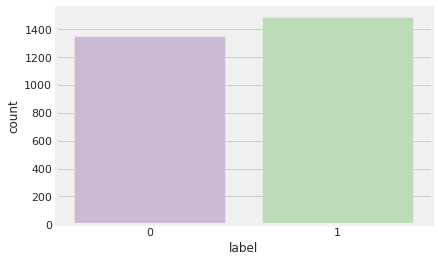

In [ ]:
print('Number of train data', len(train))
sns.countplot('label', data = train, palette='PRGn')

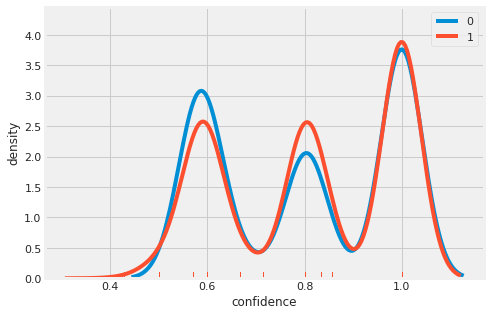

In [ ]:
train[['label', 'confidence']]

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

label_0 = train.loc[train['label'] == 0]
label_1 = train.loc[train['label'] == 1]

sns.distplot(label_0[['confidence']], hist=False, rug=True, ax=ax, label=0)
sns.distplot(label_1[['confidence']], hist=False, rug=True, ax=ax, label=1)

ax.legend()
ax.set_xlabel('confidence')
ax.set_ylabel('density')
plt.show()

In [ ]:
train_x = train_df.text
train_y = train_df.subreddit

test_x = test_df.text
test_y = test_df.subreddit

train_x[0], train_y[0]

('He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI\'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f\'n worried about my heart. I do happen to have a physical in 48 hours.',
 'ptsd')

**Test data Label values**

In [ ]:
test_df['label'].value_counts()

1    369
0    346
Name: label, dtype: int64

In [ ]:
label_1_para = str.lower(''.join(test_df[test_df['label'] == 1]['text']))
label_1_para[:1000]

'we\'d be saving so much money with this new housr...its such an expensive city.... i did some googling in their language and found that it was illegal for them to do that. i was excited like oh ok if it happens ill call the police on them....  but now i did some further googling and turns out that if you sign the contract with that in it than everything is on their side... the contract is long term so we\'d have to give 6months notice before leaving even if we give it next week ill still have to live six months with this.... i wanna die i swear i havent been so helpless and scared in so long.... also two days ago my friend mentioned he ran into my ex who ruined my life and that he told him he wants to see mw and get closure.my ex used to shoot back with "do you want me to go with you?" all the time, no matter what it was. i almost wonder if i blocked out him asking me that about our own wedding. i unloaded a terrible memory of this on my current bf today and he took it like a champ, i

In [ ]:
label_0_para = str.lower(''.join(test_df[test_df['label'] == 0]['text']))
label_0_para[:1000]

'its like that, if you want or not.“ me: i have no problem, if it takes longer. but you asked my friend for help and let him wait for one hour and then you haven’t prepared anything. thats not what you asked for. instead of 3 hours, he helped you for 10 hours till 5am...i man the front desk and my title is hr customer service representative. about 50% of my job is spent onboarding new hires. maybe 10% is clerical/paperwork. the rest is dealing with people who walk in and need help with benefits, retirement, etc. although i am required to know the basics of our benefits plans and how the retirement and pension benefits work, many employees have questions beyond my knowledge base.i haven’t said anything to him yet because i’m not sure how someone would take hearing that their partner has such fluctuations of feelings towards them (especially since he told me he loves me and is somewhat clingy). nonetheless, i know a conversation will need to be had but i want to get my feelings in order 

Number of test data 715


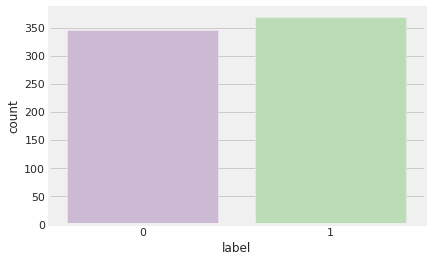

In [ ]:
print('Number of test data', len(test))
sns.countplot('label', data = test, palette='PRGn')

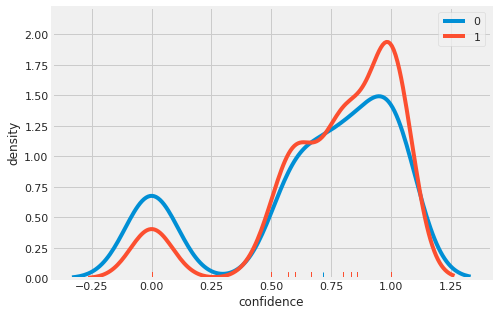

In [ ]:
test[['label', 'confidence']]

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

label_0 = test.loc[test['label'] == 0]
label_1 = test.loc[test['label'] == 1]

sns.distplot(label_0[['confidence']], hist=False, rug=True, ax=ax, label=0)
sns.distplot(label_1[['confidence']], hist=False, rug=True, ax=ax, label=1)

ax.legend()
ax.set_xlabel('confidence')
ax.set_ylabel('density')
plt.show()

## **Target Variable Analysis**
**Training Data**

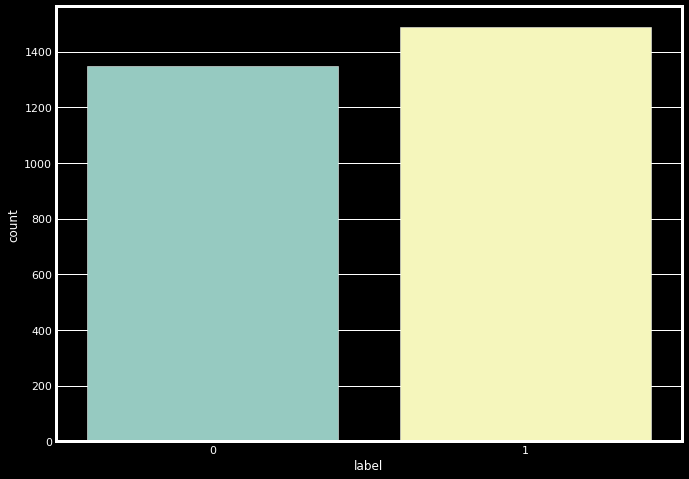

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(10,8))
# sns.set(style="darkgrid")
ax = sns.countplot(x = train['label'])

**Testing Data**

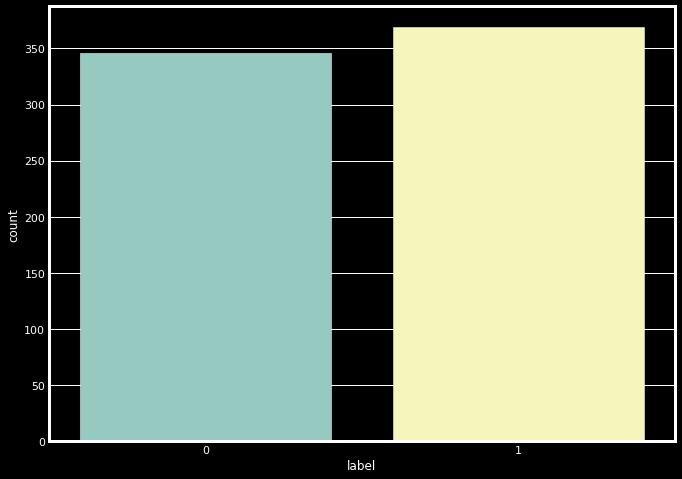

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(10,8))
# sns.set(style="darkgrid")
ax = sns.countplot(x = test['label'])

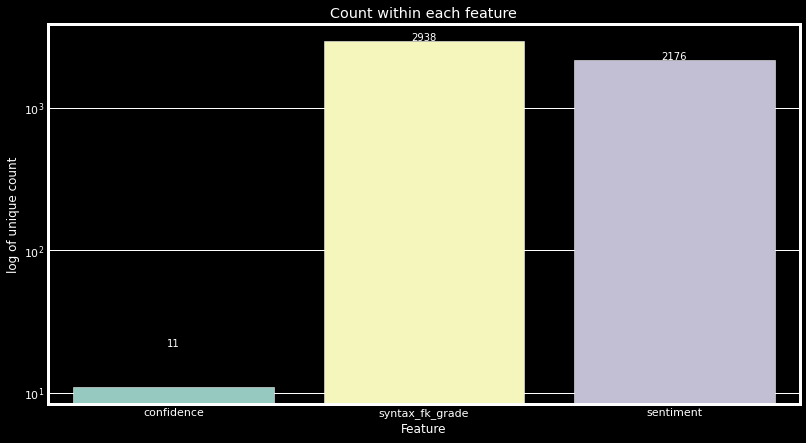

In [ ]:
col = ['confidence','syntax_fk_grade','sentiment']
cnt = [len(df[i].unique()) for i in col]

## Plotting on Barchart !

plt.figure(figsize=(12,7))
ax=sns.barplot(x=col, y=cnt, log= True)
ax.set(xlabel='Feature', ylabel='log of unique count',title="Count within each feature")
for p, uni in zip(ax.patches, cnt):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uni,
            ha="center")
plt.show()

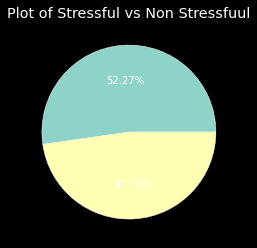

In [ ]:
plt.pie(df['label'].value_counts(normalize=True)*100,autopct='%1.2f%%')
plt.title("Plot of Stressful vs Non Stressfuul")
plt.show()

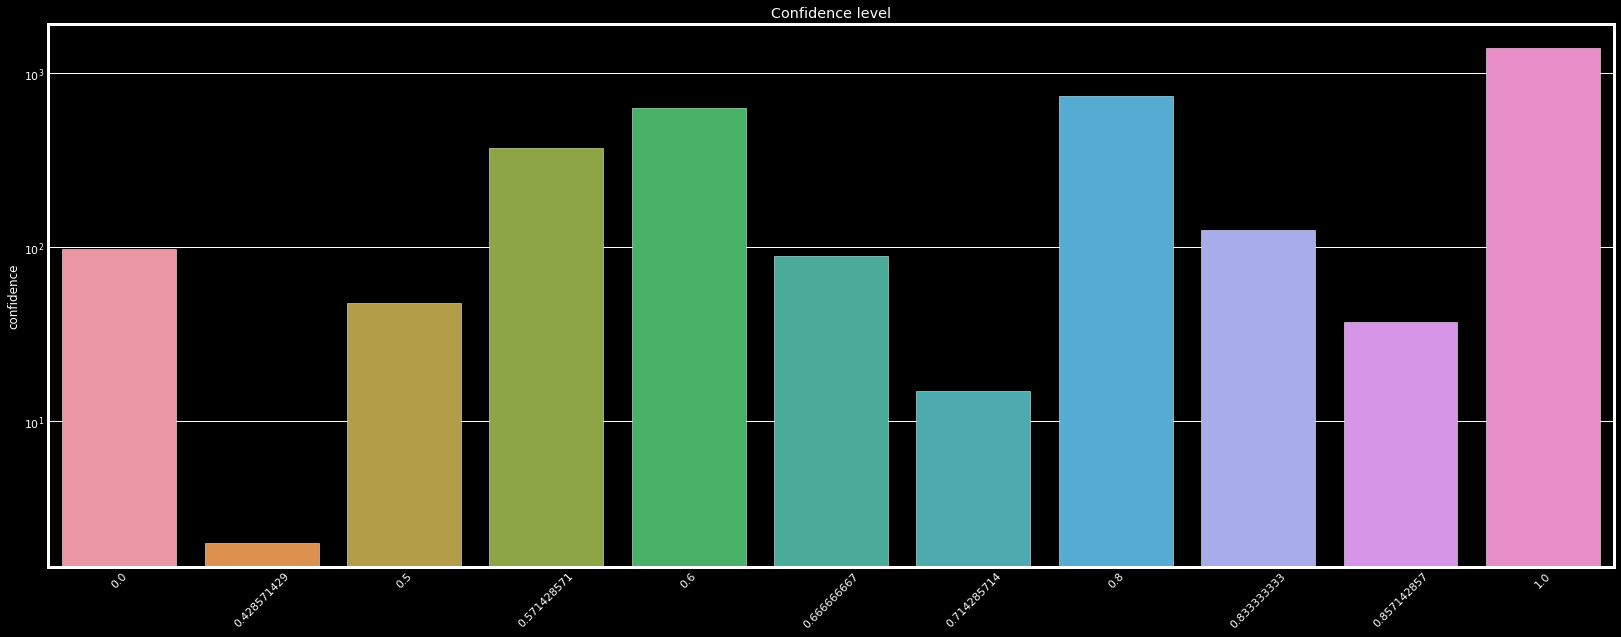

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(x=df['confidence'].value_counts().index,y=df['confidence'].value_counts(), log=True)
plt.xticks(rotation=45)
plt.title("Confidence level")
plt.show()

In [ ]:
df.corr()

subreddit        id     label  confidence  \
subreddit                  1.000000  0.013653 -0.081229   -0.079718   
id                         0.013653  1.000000 -0.044450    0.216946   
label                     -0.081229 -0.044450  1.000000    0.054743   
confidence                -0.079718  0.216946  0.054743    1.000000   
social_timestamp           0.027347 -0.012452  0.010244    0.007522   
...                             ...       ...       ...         ...   
lex_dal_avg_pleasantness   0.069790  0.011977 -0.170962    0.039931   
social_upvote_ratio       -0.029834 -0.023019  0.103405   -0.016536   
social_num_comments        0.095212  0.002912 -0.041557   -0.041177   
syntax_fk_grade            0.024610  0.100200 -0.057481    0.037067   
sentiment                 -0.001590  0.032823 -0.307780   -0.004587   

                          social_timestamp  social_karma  syntax_ari  \
subreddit                         0.027347      0.061058    0.036375   
id                               -0.012452     -0.006783    0.102747   
label                             0.010244     -0.065297   -0.091292   
confidence                        0.007522     -0.052651    0.033647   
social_timestamp                  1.000000     -0.011219   -0.006857   
...                                    ...           ...         ...   
lex_dal_avg_pleasantness          0.002914      0.010608   -0.105249   
social_upvote_ratio               0.007244      0.099576    0.000799   
social_num_comments              -0.021010      0.705146   -0.043122   
syntax_fk_grade                  -0.007433     -0.020208    0.967659   
sentiment                         0.010212      0.010987    0.074282   

                          lex_liwc_WC  lex_liwc_Analytic  lex_liwc_Clout  \
subreddit                    0.040989          -0.076025        0.136313   
id                           0.059854           0.018808        0.038709   
label                        0.100251          -0.233978       -0.392516   
confidence                  -0.000214           0.044227       -0.020872   
social_timestamp             0.002656          -0.000722       -0.027259   
...                               ...                ...             ...   
lex_dal_avg_pleasantness    -0.064523          -0.082779        0.070488   
social_upvote_ratio         -0.013735          -0.067970       -0.111083   
social_num_comments          0.003905          -0.037713        0.060838   
syntax_fk_grade              0.571960           0.258201        0.107694   
sentiment                    0.008919           0.119726        0.171256   

                          lex_liwc_Authentic  lex_liwc_Tone  lex_liwc_WPS  \
subreddit                          -0.081575       0.039939      0.016996   
id                                 -0.026512       0.051841      0.051044   
label                               0.266833      -0.450479      0.057942   
confidence                          0.026668       0.052152     -0.009006   
social_timestamp                    0.032069       0.010525      0.004342   
...                                      ...            ...           ...   
lex_dal_avg_pleasantness           -0.019214       0.423752     -0.031953   
social_upvote_ratio                 0.094645      -0.156587     -0.039227   
social_num_comments                -0.085754       0.017690     -0.001709   
syntax_fk_grade                    -0.066860       0.014975      0.451470   
sentiment                          -0.122571       0.513267      0.019038   

                          lex_liwc_Sixltr  lex_liwc_Dic  lex_liwc_function  \
subreddit                       -0.034925      0.087888           0.116253   
id                               0.076610     -0.044150          -0.000074   
label                           -0.082685      0.227076           0.227150   
confidence                       0.054626     -0.037484          -0.049567   
social_timestamp                 0.006694     -0.016175          -0.010763   
..

The above correlation table depicts the correlation between various variables where they are highly correlated with themselves (1.0).

## **Cleaning and Vectorization**

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

## **Wrodcloud based on Label**

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
stopwords = set(STOPWORDS)

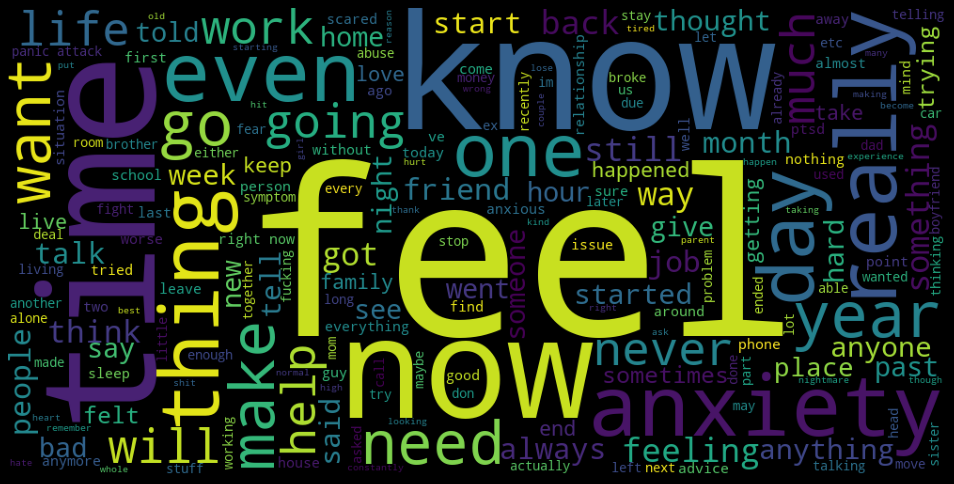

In [ ]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(label_1_para)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

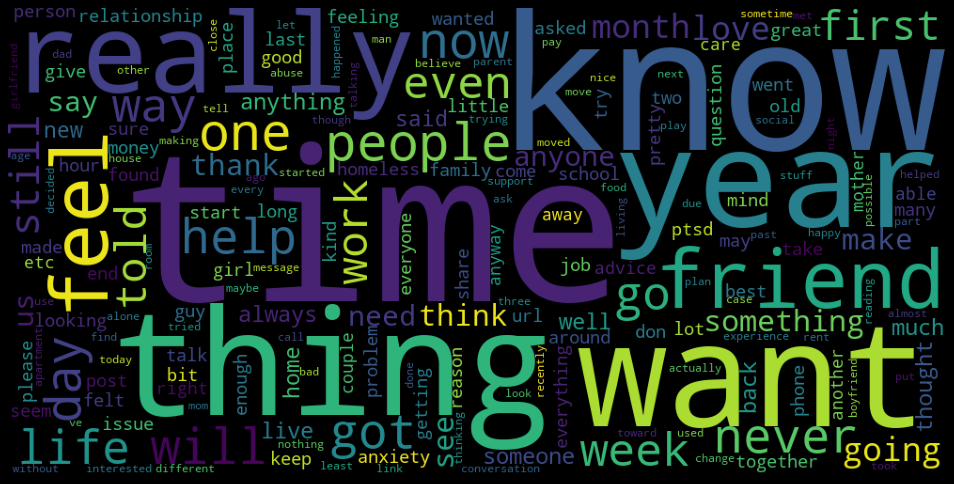

In [ ]:
wordcloud1 = WordCloud(width=1000, height=500, stopwords=stopwords).generate(label_0_para)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

## **Wordcloud Based on Sentiment**

In [ ]:
sentiment_pos = str.lower(''.join(train_df[train_df['sentiment'] > 0]['text']))
sentiment_pos[:1000]

'hey there r/assistance, not sure if this is the right place to post this.. but here goes =) i\'m currently a student intern at sandia national labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country. we\'re looking for current undergrad/grad stem students so if you\'re a stem student or know stem students, i would greatly appreciate if you can help take or pass along this short survey. as a thank you, everyone who helps take the survey will be entered in to a drawing for chance to win one of three $50 amazon gcs.my mom then hit me with the newspaper and it shocked me that she would do this, she knows i don\'t like play hitting, smacking, striking, hitting or violence of any sort on my person. do i send out this vibe asking for it from the universe? then yesterday i decided to take my friend to go help another "friend" move to a new place. while we were driving the friend we are moving strikes me on my shoulder. a

In [ ]:
sentiment_neg = str.lower(''.join(train_df[train_df['sentiment'] < 0]['text']))
sentiment_neg[:1000]

'he said he had not felt that way before, suggeted i go rest and so ..trigger ahead if youi\'re a hypocondriac like me: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something i could even laugh at down the road. no, i ended up reading that this sense of doom can be indicative of various health ailments; one of which i am prone to.. so on top of my "doom" to my gloom..i am now f\'n worried about my heart. i do happen to have a physical in 48 hours.october is domestic violence awareness month and i am a domestic violence survivor who is still struggling, even after over four years. lately i have been feeling very angry. angry that my abusive ex received no real consequences for his actions. this man abused me in all manners: physically, sexually, emotionally, verbally, financially, etc. i was granted a restraining order against him (and it was renewed a year later) b

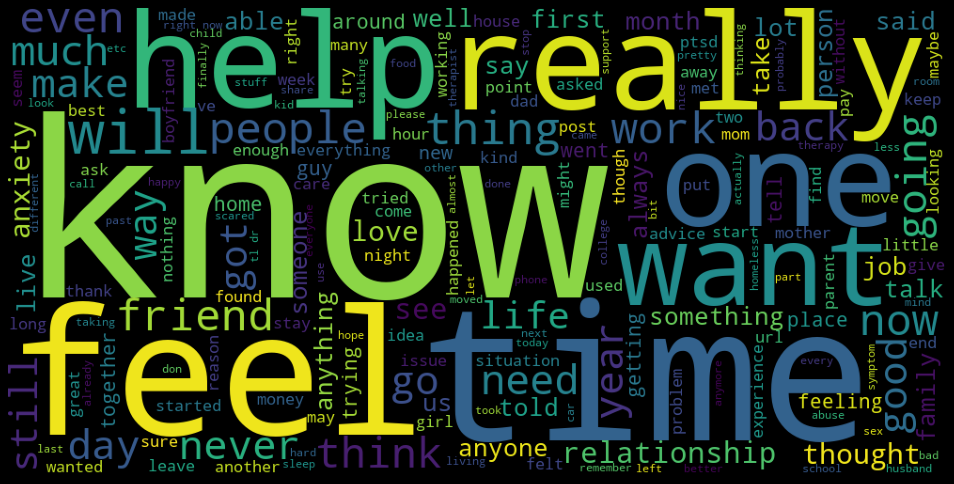

In [ ]:
wordcloud2 = WordCloud(width=1000, height=500, stopwords=stopwords).generate(sentiment_pos)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

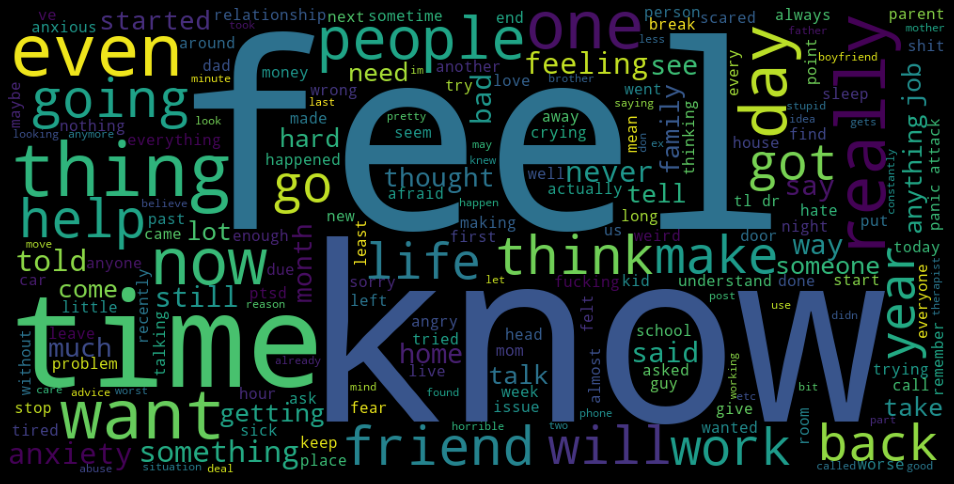

In [ ]:
wordcloud3 = WordCloud(width=1000, height=500, stopwords=stopwords).generate(sentiment_neg)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud3)
plt.axis('off')
plt.show()

In [ ]:
test_df['text'][0]

'Its like that, if you want or not.“ ME: I have no problem, if it takes longer. But you asked my friend for help and let him wait for one hour and then you haven’t prepared anything. Thats not what you asked for. Instead of 3 hours, he helped you for 10 hours till 5am...'

In [ ]:
train_df.head(1)

subreddit post_id sentence_range  \
0      ptsd  8601tu       (15, 20)   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   

   confidence  social_timestamp  social_karma  syntax_ari  lex_liwc_WC  \
0         0.8        1521614353             5    1.806818          116   

   lex_liwc_Analytic  lex_liwc_Clout  lex_liwc_Authentic  lex_liwc_Tone  \
0              72.64           15.04               89.26            1.0   

   lex_liwc_WPS  lex_liwc_Sixltr  lex_liwc_Dic  lex_liwc_function  \
0          29.0            12.93         87.07              56.03   

   lex_liwc_pronoun  lex_liwc_ppron  lex_liwc_i  lex_liwc_we  lex_liwc_you  \
0             16.38           12.07        9.48          0.0          0.86   

   lex_liwc_shehe  lex_liwc_they  lex_liwc_ipron  lex_liwc_article  \
0            1.72            0.0            4.31              3.45   

   lex_liwc_prep  lex_liwc_auxverb  lex_liwc_adverb  lex_liwc_conj  \
0          19.83              7.76             5.17           4.31   

   lex_liwc_negate  lex_liwc_verb  lex_liwc_adj  lex_liwc_compare  \
0             1.72          16.38          6.03              3.45   

   lex_liwc_interrog  lex_liwc_number  lex_liwc_quant  lex_liwc_affect  \
0               0.86             1.72            1.72             8.62   

   lex_liwc_posemo  lex_liwc_negemo  lex_liwc_anx  lex_liwc_anger  \
0             1.72              6.9          0.86            2.59   

   lex_liwc_sad  lex_liwc_social  lex_liwc_family  lex_liwc_friend  \
0          3.45             3.45              0.0              0.0   

   lex_liwc_female  lex_liwc_male  lex_liwc_cogproc  lex_liwc_insight  \
0              0.0           1.72             11.21              3.45   

   lex_liwc_cause  lex_liwc_discrep  lex_liwc_tentat  lex_liwc_certain  \
0            0.86              2.59             5.17               0.0   

   lex_liwc_differ  lex_liwc_percept  lex_liwc_see  lex_liwc_hear  \
0             2.59              6.03          1.72           1.72   

   lex_liwc_feel  lex_liwc_bio  lex_liwc_body  lex_liwc_health  \
0           1.72          2.59           0.86             1.72   

   lex_liwc_sexual  lex_liwc_ingest  lex_liwc_drives  lex_liwc_affiliation  \
0              0.0              0.0             8.62                   0.0   

   lex_liwc_achieve  lex_liwc_power  lex_liwc_reward  lex_liwc_risk  \
0              1.72            4.31             0.86           2.59   

   lex_liwc_focuspast  lex_liwc_focuspresent  lex_liwc_focusfuture  \
0                4.31                  11.21                  0.86   

   lex_liwc_relativ  lex_liwc_motion  lex_liwc_space  lex_liwc_time  \
0             17.24             0.86           10.34           6.03   

   lex_liwc_work  lex_liwc_leisure  lex_liwc_home  lex_liwc_money  \
0           0.86               0.0            0.0             0.0   

   lex_liwc_relig  lex_liwc_death  lex_liwc_informal  lex_liwc_swear  \
0            2.59             0.0               0.86            0.86   

   lex_liwc_netspeak  lex_liwc_assent  lex_liwc_nonflu  lex_liwc_filler  \
0                0.0              0.0              0.0              0.0   

   lex_liwc_AllPunc  lex_liwc_Period  lex_liwc_Comma  lex_liwc_Colon  \
0             21.55             9.48            3.45            0.86   

   lex_liwc_SemiC  lex_liwc_QMark  lex_liwc_Exclam  lex_liwc_Dash  \
0            0.86             0.0              0.0            0.0   

   lex_liwc_Quote  lex_liwc_Apostro  lex_liwc_Parenth  lex_liwc_OtherP  \
0            5.17              1.72               0.0              0.0   

   lex_dal_max_pleasantness  lex_dal_max_activation  lex_dal_max_imagery  \
0                    2.8571                   2.625                  3.0   

   lex_dal_min_pleasantness  lex_dal_min_activation  lex_dal_min_imagery  \
0                       1.0                   1.125                  1.0   

   lex_dal_a

In [ ]:
train_df.drop(['text', 'post_id' , 'sentence_range', 'id', 'social_timestamp'], axis=1, inplace=True)

In [ ]:
train_df.head(1)

subreddit  label  confidence  social_karma  syntax_ari  lex_liwc_WC  \
0      ptsd      1         0.8             5    1.806818          116   

   lex_liwc_Analytic  lex_liwc_Clout  lex_liwc_Authentic  lex_liwc_Tone  \
0              72.64           15.04               89.26            1.0   

   lex_liwc_WPS  lex_liwc_Sixltr  lex_liwc_Dic  lex_liwc_function  \
0          29.0            12.93         87.07              56.03   

   lex_liwc_pronoun  lex_liwc_ppron  lex_liwc_i  lex_liwc_we  lex_liwc_you  \
0             16.38           12.07        9.48          0.0          0.86   

   lex_liwc_shehe  lex_liwc_they  lex_liwc_ipron  lex_liwc_article  \
0            1.72            0.0            4.31              3.45   

   lex_liwc_prep  lex_liwc_auxverb  lex_liwc_adverb  lex_liwc_conj  \
0          19.83              7.76             5.17           4.31   

   lex_liwc_negate  lex_liwc_verb  lex_liwc_adj  lex_liwc_compare  \
0             1.72          16.38          6.03              3.45   

   lex_liwc_interrog  lex_liwc_number  lex_liwc_quant  lex_liwc_affect  \
0               0.86             1.72            1.72             8.62   

   lex_liwc_posemo  lex_liwc_negemo  lex_liwc_anx  lex_liwc_anger  \
0             1.72              6.9          0.86            2.59   

   lex_liwc_sad  lex_liwc_social  lex_liwc_family  lex_liwc_friend  \
0          3.45             3.45              0.0              0.0   

   lex_liwc_female  lex_liwc_male  lex_liwc_cogproc  lex_liwc_insight  \
0              0.0           1.72             11.21              3.45   

   lex_liwc_cause  lex_liwc_discrep  lex_liwc_tentat  lex_liwc_certain  \
0            0.86              2.59             5.17               0.0   

   lex_liwc_differ  lex_liwc_percept  lex_liwc_see  lex_liwc_hear  \
0             2.59              6.03          1.72           1.72   

   lex_liwc_feel  lex_liwc_bio  lex_liwc_body  lex_liwc_health  \
0           1.72          2.59           0.86             1.72   

   lex_liwc_sexual  lex_liwc_ingest  lex_liwc_drives  lex_liwc_affiliation  \
0              0.0              0.0             8.62                   0.0   

   lex_liwc_achieve  lex_liwc_power  lex_liwc_reward  lex_liwc_risk  \
0              1.72            4.31             0.86           2.59   

   lex_liwc_focuspast  lex_liwc_focuspresent  lex_liwc_focusfuture  \
0                4.31                  11.21                  0.86   

   lex_liwc_relativ  lex_liwc_motion  lex_liwc_space  lex_liwc_time  \
0             17.24             0.86           10.34           6.03   

   lex_liwc_work  lex_liwc_leisure  lex_liwc_home  lex_liwc_money  \
0           0.86               0.0            0.0             0.0   

   lex_liwc_relig  lex_liwc_death  lex_liwc_informal  lex_liwc_swear  \
0            2.59             0.0               0.86            0.86   

   lex_liwc_netspeak  lex_liwc_assent  lex_liwc_nonflu  lex_liwc_filler  \
0                0.0              0.0              0.0              0.0   

   lex_liwc_AllPunc  lex_liwc_Period  lex_liwc_Comma  lex_liwc_Colon  \
0             21.55             9.48            3.45            0.86   

   lex_liwc_SemiC  lex_liwc_QMark  lex_liwc_Exclam  lex_liwc_Dash  \
0            0.86             0.0              0.0            0.0   

   lex_liwc_Quote  lex_liwc_Apostro  lex_liwc_Parenth  lex_liwc_OtherP  \
0            5.17              1.72               0.0              0.0   

   lex_dal_max_pleasantness  lex_dal_max_activation  lex_dal_max_imagery  \
0                    2.8571                   2.625                  3.0   

   lex_dal_min_pleasantness  lex_dal_min_activation  lex_dal_min_imagery  \
0                       1.0                   1.125                  1.0   

   lex_dal_avg_activation  lex_dal_avg_imagery  lex_dal_avg_pleasantness  \
0                    1.77              1.52211                   1.89556   

   social_upvote_ratio  social_num_comments  syntax_fk_grade  sentiment  
0    

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, Normalizer
from sklearn.feature_selection import SelectKBest, chi2, RFE, VarianceThreshold, mutual_info_classif, SelectKBest
minmax = MinMaxScaler()
stdscaler = StandardScaler()
norm = Normalizer()
label_enc = LabelEncoder()
train_df['subreddit'] = label_enc.fit_transform(train_df['subreddit'])
X = train_df.drop('label', axis=1)
y = train_df['label']

## **Tokenize**

In [ ]:
import nltk
nltk.download('punkt')
train_x_tk = [word_tokenize(x) for x in train_x]
print(train_x_tk[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['He', 'said', 'he', 'had', 'not', 'felt', 'that', 'way', 'before', ',', 'suggeted', 'I', 'go', 'rest', 'and', 'so', '..TRIGGER', 'AHEAD', 'IF', 'YOUI', "'RE", 'A', 'HYPOCONDRIAC', 'LIKE', 'ME', ':', 'i', 'decide', 'to', 'look', 'up', '``', 'feelings', 'of', 'doom', "''", 'in', 'hopes', 'of', 'maybe', 'getting', 'sucked', 'into', 'some', 'rabbit', 'hole', 'of', 'ludicrous', 'conspiracy', ',', 'a', 'stupid', '``', 'are', 'you', 'psychic', "''", 'test', 'or', 'new', 'age', 'b.s.', ',', 'something', 'I', 'could', 'even', 'laugh', 'at', 'down', 'the', 'road', '.', 'No', ',', 'I', 'ended', 'up', 'reading', 'that', 'this', 'sense', 'of', 'doom', 'can', 'be', 'indicative', 'of', 'various', 'health', 'ailments', ';', 'one', 'of', 'which', 'I', 'am', 'prone', 'to..', 'So', 'on', 'top', 'of', 'my', '``', 'doom', "''", 'to', 'my', 'gloom..I', 'am', 'now', "f'n", 'worried', 'about', 'my', 'hea

## **Lemmatize & Stem Tokens**

In [ ]:
def lem_def_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()

    processed_tokens = []
    for item in train_x_tk:
        item_lem = [lemmatizer.lemmatize(x) for x in item]
        item_stem = ' '.join([stemmer.stem(x) for x in item_lem])
        item_str = re.sub(r'\d', '', item_stem)
        processed_tokens.append(item_str)

    return processed_tokens
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
train_x_lem = lem_def_tokens(train_x_tk)
train_x_lem[0]

"He said he had not felt that way befor , sugget I go rest and so ..trigger ahead IF youi 're A hypocondriac like ME : i decid to look up `` feel of doom '' in hope of mayb get suck into some rabbit hole of ludicr conspiraci , a stupid `` are you psychic '' test or new age b.s. , someth I could even laugh at down the road . No , I end up read that thi sens of doom can be indic of variou health ailment ; one of which I am prone to.. So on top of my `` doom '' to my gloom..i am now f'n worri about my heart . I do happen to have a physic in  hour ."

## **Vectorize**

In [ ]:
vectorizer = CountVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x_lem)
print(vectorizer.get_feature_names()[25:30], '...')
print(train_x_vectors.toarray()[0, 25:30], '...')

['about', 'abov', 'above', 'abras', 'abridg'] ...
[1 0 0 0 0] ...


## **Correlation Method**

Label ---> 1 (Stress)

Label ---> 0 (Not stress)

In [ ]:
df.corr().abs()['label'].sort_values(ascending = False)[:30]

label                       1.000000
lex_liwc_Tone               0.450479
lex_liwc_negemo             0.394988
lex_liwc_Clout              0.392516
lex_liwc_i                  0.387434
sentiment                   0.307780
lex_dal_min_pleasantness    0.290220
lex_liwc_posemo             0.288324
lex_liwc_anx                0.271179
lex_liwc_Authentic          0.266833
lex_liwc_social             0.245331
lex_liwc_Analytic           0.233978
lex_liwc_function           0.227150
lex_liwc_Dic                0.227076
lex_liwc_anger              0.217469
lex_liwc_you                0.211981
lex_liwc_feel               0.203389
lex_liwc_sad                0.202216
lex_liwc_affiliation        0.184311
lex_liwc_ppron              0.178081
lex_liwc_negate             0.177613
lex_liwc_Apostro            0.172879
lex_liwc_risk               0.172531
lex_liwc_pronoun            0.171689
lex_dal_avg_pleasantness    0.170962
lex_liwc_focuspresent       0.169931
lex_liwc_swear              0.165632
l

### **Pearson Correlation**

In [ ]:
def correlation(df, thres): #Dataset and threshold value
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > thres:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X, 0.7)
len(corr_features)

11

In [ ]:
corr_features
X[corr_features]

lex_liwc_negemo  lex_liwc_time  syntax_fk_grade  lex_liwc_i  \
0                6.90           6.03         3.253573        9.48   
1                0.00           1.83         8.828316        1.83   
2                1.20           5.39         7.841667        8.98   
3                2.93           6.23         4.104027       16.12   
4                7.87          10.11         7.910952        7.87   
...               ...            ...              ...         ...   
2833             1.12           7.87         0.254444        5.62   
2834             5.93           8.15         8.640664       11.11   
2835             0.75           2.99         9.951524        0.00   
2836             5.88           2.94         4.036765        4.41   
2837             7.02           5.26         2.412000       14.04   

      lex_liwc_ppron  lex_liwc_posemo  lex_liwc_WPS  lex_liwc_pronoun  \
0              12.07             1.72         29.00             16.38   
1               7.34             5.50         27.25             11.93   
2              16.17             1.20         33.40             25.15   
3              23.44             5.86         54.60             30.40   
4              11.24             0.00         17.80             15.73   
...              ...              ...           ...               ...   
2833           20.22             7.87         17.80             25.84   
2834           11.11             1.48         27.00             16.30   
2835            8.21             3.73         22.33             12.69   
2836           11.76             5.88         13.60             17.65   
2837           22.81             1.75         14.25             31.58   

      lex_liwc_OtherP  social_num_comments  lex_liwc_social  
0                0.00                    1             3.45  
1                3.67                    2            11.01  
2                0.00                    0            15.57  
3                0.00                    5            13.55  
4                0.00                    1             8.99  
...               ...                  ...              ...  
2833             6.74                   16            23.60  
2834             0.00                    6             0.00  
2835             0.75                    1            14.18  
2836             0.00                    7            14.71  
2837             0.00                    2            21.05  

[2838 rows x 11 columns]

**Mutual Info Classifier**

In [ ]:
# mutual_cls
mutual_cls = mutual_info_classif(X, y)
select_20_cols = SelectKBest(mutual_info_classif, k=20)
select_20_cols.fit(X, y)
mutual_cols = X.columns[select_20_cols.get_support()]
mutual_cols

Index(['lex_liwc_Analytic', 'lex_liwc_Clout', 'lex_liwc_Authentic',
       'lex_liwc_Tone', 'lex_liwc_Dic', 'lex_liwc_function', 'lex_liwc_i',
       'lex_liwc_you', 'lex_liwc_verb', 'lex_liwc_affect', 'lex_liwc_posemo',
       'lex_liwc_negemo', 'lex_liwc_anx', 'lex_liwc_social',
       'lex_liwc_focuspast', 'lex_liwc_Apostro', 'lex_liwc_OtherP',
       'lex_dal_min_pleasantness', 'lex_dal_avg_activation', 'sentiment'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

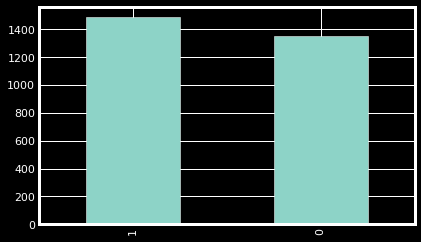

In [ ]:
y.value_counts().plot(kind='bar')

In [ ]:
def best_model(X, y, scaler, algo):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)

    y_train = np.asarray(y_train)
    y_test = np.asarray(y_test)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = algo()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    training_score = model.score(X_train, y_train)
    acc = accuracy_score(y_test, predictions)
    con = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f'Training Score: {training_score}')
    print(f'Accuracy Score: {acc}')
    print(f'Confusion Matrix: {con}')
    print(f'Classification Report: {report}')

**Chi score**

In [ ]:
num_feats = 30
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
X[chi_feature]

lex_liwc_Analytic  lex_liwc_Clout  lex_liwc_Authentic  lex_liwc_Tone  \
0                 72.64           15.04               89.26           1.00   
1                 79.08           76.85               56.75          98.18   
2                 33.80           76.38               86.24          25.77   
3                  2.98           15.25               95.42          79.26   
4                 32.22           28.71               84.01           1.00   
...                 ...             ...                 ...            ...   
2833              19.41           99.00               37.57          99.00   
2834              40.97            4.45               98.01           1.00   
2835              79.52           97.34                2.27          80.01   
2836              29.74           61.58               21.06          25.77   
2837               1.00           29.92               28.23           1.00   

      lex_liwc_ppron  lex_liwc_i  lex_liwc_we  lex_liwc_you  lex_liwc_article  \
0              12.07        9.48         0.00          0.86              3.45   
1               7.34        1.83         2.75          2.75              8.26   
2              16.17        8.98         1.80          1.80              5.39   
3              23.44       16.12         0.37          0.37              3.30   
4              11.24        7.87         0.00          0.00              4.49   
...              ...         ...          ...           ...               ...   
2833           20.22        5.62         3.37          6.74              3.37   
2834           11.11       11.11         0.00          0.00              5.19   
2835            8.21        0.00         4.48          3.73              5.22   
2836           11.76        4.41         0.00          1.47              5.88   
2837           22.81       14.04         0.00          0.00              1.75   

      lex_liwc_adverb  lex_liwc_negate  lex_liwc_posemo  lex_liwc_negemo  \
0                5.17             1.72             1.72             6.90   
1                3.67             0.92             5.50             0.00   
2                1.80             1.20             1.20             1.20   
3                6.59             3.66             5.86             2.93   
4                4.49             2.25             0.00             7.87   
...               ...              ...              ...              ...   
2833             2.25             1.12             7.87             1.12   
2834             5.93             2.96             1.48             5.93   
2835             4.48             0.75             3.73             0.75   
2836             2.94             1.47             5.88             5.88   
2837             7.02             5.26             1.75             7.02   

      lex_liwc_anx  lex_liwc_anger  lex_liwc_sad  lex_liwc_social  \
0             0.86            2.59          3.45             3.45   
1             0.00            0.00          0.00            11.01   
2             0.00            0.00          0.00            15.57   
3             0.00            0.37          0.73            13.55   
4             1.12            4.49          0.00             8.99   
...            ...             ...           ...              ...   
2833          0.00            0.00          0.00            23.60   
2834          4.44            0.00          0.74             0.00   
2835          0.00            0.00          0.00            14.18   
2836          1.47            1.47          0.00            14.71   
2837          1.75            0.00          0.00            21.05   

      lex_liwc_female  lex_liwc_feel  lex_liwc_health  lex_liwc_sexual  \
0                0.00           1.72             1.72             0.00   
1                0.00           0.00             0.00             0.00   
2                1.80           0.00             0.00             0.00   
3                0.37           5.49             0.00     

**Using chi2 features**

In [ ]:
X_chi = X[chi_feature]
best_model(X_chi, y, minmax, LogisticRegression)

Training Score: 0.7612781954887218
Accuracy Score: 0.752112676056338
Confusion Matrix: [[225  97]
 [ 79 309]]
Classification Report:               precision    recall  f1-score   support

           0       0.74      0.70      0.72       322
           1       0.76      0.80      0.78       388

    accuracy                           0.75       710
   macro avg       0.75      0.75      0.75       710
weighted avg       0.75      0.75      0.75       710



In [ ]:
best_model(X_chi, y, minmax, KNeighborsClassifier)

Training Score: 0.805921052631579
Accuracy Score: 0.7056338028169014
Confusion Matrix: [[206 124]
 [ 85 295]]
Classification Report:               precision    recall  f1-score   support

           0       0.71      0.62      0.66       330
           1       0.70      0.78      0.74       380

    accuracy                           0.71       710
   macro avg       0.71      0.70      0.70       710
weighted avg       0.71      0.71      0.70       710



In [ ]:
best_model(X_chi, y, minmax, DecisionTreeClassifier)

Training Score: 1.0
Accuracy Score: 0.652112676056338
Confusion Matrix: [[197 113]
 [134 266]]
Classification Report:               precision    recall  f1-score   support

           0       0.60      0.64      0.61       310
           1       0.70      0.67      0.68       400

    accuracy                           0.65       710
   macro avg       0.65      0.65      0.65       710
weighted avg       0.66      0.65      0.65       710



In [ ]:
best_model(X_chi, y, minmax, RandomForestClassifier)

Training Score: 0.9990601503759399
Accuracy Score: 0.7295774647887324
Confusion Matrix: [[232  98]
 [ 94 286]]
Classification Report:               precision    recall  f1-score   support

           0       0.71      0.70      0.71       330
           1       0.74      0.75      0.75       380

    accuracy                           0.73       710
   macro avg       0.73      0.73      0.73       710
weighted avg       0.73      0.73      0.73       710



In [ ]:
best_model(X_chi, y, minmax, XGBClassifier)

Training Score: 0.8458646616541353
Accuracy Score: 0.7366197183098592
Confusion Matrix: [[239  95]
 [ 92 284]]
Classification Report:               precision    recall  f1-score   support

           0       0.72      0.72      0.72       334
           1       0.75      0.76      0.75       376

    accuracy                           0.74       710
   macro avg       0.74      0.74      0.74       710
weighted avg       0.74      0.74      0.74       710



**Variance Method**

In [ ]:
var_thres = VarianceThreshold(0)
var_thres.fit(X_norm)

VarianceThreshold(threshold=0)

In [ ]:
cols_selected = X.loc[:, var_thres.get_support()].columns.tolist()
# cols_selected
X[cols_selected]

subreddit  confidence  social_karma  syntax_ari  lex_liwc_WC  \
0             6    0.800000             5    1.806818          116   
1             2    1.000000             4    9.429737          109   
2             6    0.800000             2    7.769821          167   
3             7    0.600000             0    2.667798          273   
4             9    0.800000            24    7.554238           89   
...         ...         ...           ...         ...          ...   
2833          7    1.000000            13   -1.369333           89   
2834          6    1.000000            33    9.425478          135   
2835          1    1.000000             2   11.060675          134   
2836          0    0.571429             4    2.421912           68   
2837          6    0.571429             2    0.835254           57   

      lex_liwc_Analytic  lex_liwc_Clout  lex_liwc_Authentic  lex_liwc_Tone  \
0                 72.64           15.04               89.26           1.00   
1                 79.08           76.85               56.75          98.18   
2                 33.80           76.38               86.24          25.77   
3                  2.98           15.25               95.42          79.26   
4                 32.22           28.71               84.01           1.00   
...                 ...             ...                 ...            ...   
2833              19.41           99.00               37.57          99.00   
2834              40.97            4.45               98.01           1.00   
2835              79.52           97.34                2.27          80.01   
2836              29.74           61.58               21.06          25.77   
2837               1.00           29.92               28.23           1.00   

      lex_liwc_WPS  lex_liwc_Sixltr  lex_liwc_Dic  lex_liwc_function  \
0            29.00            12.93         87.07              56.03   
1            27.25            21.10         87.16              48.62   
2            33.40            17.37         91.02              61.68   
3            54.60             8.06         98.90              65.57   
4            17.80            31.46         88.76              52.81   
...            ...              ...           ...                ...   
2833         17.80             5.62         97.75              57.30   
2834         27.00            17.78         96.30              58.52   
2835         22.33            25.37         84.33              48.51   
2836         13.60            16.18         92.65              57.35   
2837         14.25             7.02         98.25              68.42   

      lex_liwc_pronoun  lex_liwc_ppron  lex_liwc_i  lex_liwc_we  lex_liwc_you  \
0                16.38           12.07        9.48         0.00          0.86   
1                11.93            7.34        1.83         2.75          2.75   
2                25.15           16.17        8.98         1.80          1.80   
3                30.40           23.44       16.12         0.37          0.37   
4                15.73           11.24        7.87         0.00          0.00   
...                ...             ...         ...          ...           ...   
2833             25.84           20.22        5.62         3.37          6.74   
2834             16.30           11.11       11.11         0.00          0.00   
2835             12.69            8.21        0.00         4.48          3.73   
2836             17.65           11.76        4.41         0.00          1.47   
2837             31.58           22.81       14.04         0.00          0.00   

      lex_liwc_shehe  lex_liwc_they  lex_liwc_ipron  lex_liwc_article  \
0               1.72           0.00            4.31              3.45   
1               0.00           0.00            4.59              8.26   
2               2.99           0.60            8.98              5.39   
3               6.59           0.00            6.96              3.30   
4               3.37     

**Variance Features**

In [ ]:
X_var = X[cols_selected]
best_model(X_var, y, minmax, LogisticRegression)

Training Score: 0.7777255639097744
Accuracy Score: 0.7647887323943662
Confusion Matrix: [[244 106]
 [ 61 299]]
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.70      0.75       350
           1       0.74      0.83      0.78       360

    accuracy                           0.76       710
   macro avg       0.77      0.76      0.76       710
weighted avg       0.77      0.76      0.76       710



In [ ]:
best_model(X_var, y, minmax, KNeighborsClassifier)

Training Score: 0.8106203007518797
Accuracy Score: 0.6676056338028169
Confusion Matrix: [[190 152]
 [ 84 284]]
Classification Report:               precision    recall  f1-score   support

           0       0.69      0.56      0.62       342
           1       0.65      0.77      0.71       368

    accuracy                           0.67       710
   macro avg       0.67      0.66      0.66       710
weighted avg       0.67      0.67      0.66       710



In [ ]:
best_model(X_var, y, minmax, DecisionTreeClassifier)

Training Score: 1.0
Accuracy Score: 0.7169014084507043
Confusion Matrix: [[238 104]
 [ 97 271]]
Classification Report:               precision    recall  f1-score   support

           0       0.71      0.70      0.70       342
           1       0.72      0.74      0.73       368

    accuracy                           0.72       710
   macro avg       0.72      0.72      0.72       710
weighted avg       0.72      0.72      0.72       710



In [ ]:
best_model(X_var, y, minmax, RandomForestClassifier)

Training Score: 1.0
Accuracy Score: 0.7605633802816901
Confusion Matrix: [[257  94]
 [ 76 283]]
Classification Report:               precision    recall  f1-score   support

           0       0.77      0.73      0.75       351
           1       0.75      0.79      0.77       359

    accuracy                           0.76       710
   macro avg       0.76      0.76      0.76       710
weighted avg       0.76      0.76      0.76       710



**Train SVM**

In [ ]:
clf = SVC(kernel='linear')
clf.fit(train_x_vectors, train_y)

SVC(kernel='linear')

## **All 9 models to be applied**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

def get_models():

    models = dict()
    models['lr'] = make_pipeline(StandardScaler(),LogisticRegression(solver = 'saga', C = 70.0))
    models['knn'] = make_pipeline(StandardScaler(),KNeighborsClassifier())
    models['cart'] = DecisionTreeClassifier(max_depth = 1)
    models['svm'] = make_pipeline(StandardScaler(),SVC())
    models['bayes'] = make_pipeline(StandardScaler(), GaussianNB())
    models['xgboost'] = XGBClassifier(n_estimators = 11, max_depth = 1)
    models['GBM'] = GradientBoostingClassifier(n_estimators = 10)
    models['rf'] = RandomForestClassifier(n_estimators = 10)
    models['adaboost'] = AdaBoostClassifier(n_estimators= 12)

    return models

## **Models to be applied with 10 fold repeated stratified K fold cross validation**

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=1)
	scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import mean
from numpy import std

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.2f (%.2f)' % (name, scores.mean(), std(scores)))

>lr 0.78 (0.03)
>knn 0.75 (0.02)
>cart 0.74 (0.02)
>svm 0.78 (0.03)
>bayes 0.77 (0.02)
>xgboost 0.74 (0.02)
>GBM 0.76 (0.03)
>rf 0.72 (0.03)
>adaboost 0.75 (0.03)


Logistic regression and SVM gave the highest accuracy!
